In [6]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Softmax classifier

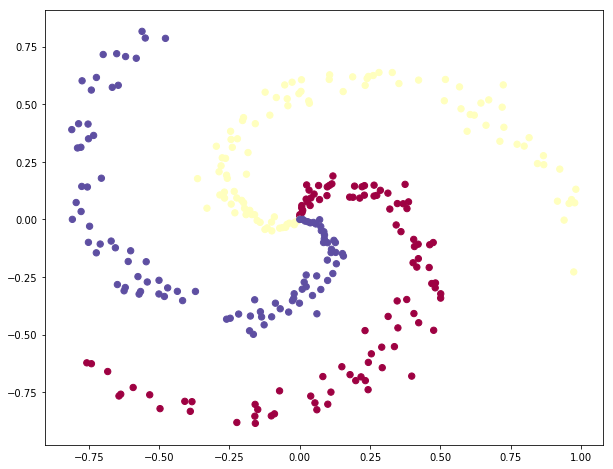

In [7]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [10]:
from softmax_classifier import SoftmaxClassifier
softmax = SoftmaxClassifier()
softmax.train(X, y)

iteration 0: loss 1.099716
iteration 10: loss 0.891724
iteration 20: loss 0.814216
iteration 30: loss 0.778574
iteration 40: loss 0.759695
iteration 50: loss 0.748734
iteration 60: loss 0.741959
iteration 70: loss 0.737583
iteration 80: loss 0.734660
iteration 90: loss 0.732660
iteration 100: loss 0.731263
iteration 110: loss 0.730273
iteration 120: loss 0.729561
iteration 130: loss 0.729045
iteration 140: loss 0.728667
iteration 150: loss 0.728389
iteration 160: loss 0.728183
iteration 170: loss 0.728029
iteration 180: loss 0.727914
iteration 190: loss 0.727827


In [12]:
# evaluate training set accuracy
y_pred = softmax.predict(X)
print 'training accuracy: %.2f' % (np.mean(y_pred == y))

training accuracy: 0.53


(-1.8850174437124831, 1.8149825562875201)

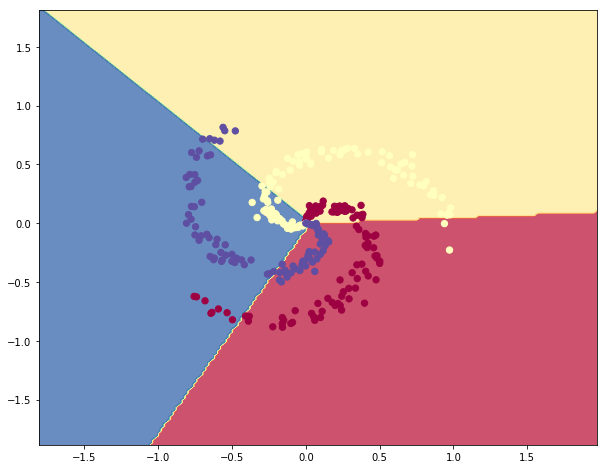

In [14]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], softmax.W) + softmax.b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

## Neural Network